<a href="https://colab.research.google.com/github/LestyMV/Shark-attack/blob/main/Shark_Attack_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import pandas as pd
import re
from matplotlib import pyplot as plt
import plotly.express as px 
import numpy as np

#Reading data
shark_data = pd.read_csv("attacks.csv", encoding="latin1")
 
# Set the case number as the index
shark_data = shark_data.set_index('Case Number')

# Remove columns I don't care for
shark_data = shark_data.drop(axis=1,columns=shark_data.columns[14:], inplace=False)

#Cleaning data
display(shark_data.shape)
shark_data["Country"] = shark_data["Country"].str.capitalize()
shark_data.rename(columns={'Sex ':'Sex'},inplace=True)
shark_data.rename(columns={'Species ':'Species'},inplace=True)

(25723, 14)

In [ ]:
shark_data.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species'],
      dtype='object')

In [ ]:
shark_data.dtypes

Date            object
Year           float64
Type            object
Country         object
Area            object
Location        object
Activity        object
Name            object
Sex             object
Age             object
Injury          object
Fatal (Y/N)     object
Time            object
Species         object
dtype: object

In [ ]:
def print_separator(sep, num, msg):
  print("\n")
  print(sep * num)
  print(f"{msg}")
  print(sep * num)


def look_at_unique_values(column): 
  unique_values_cutoff = 500
  unique_values = column.unique()
  num_unique_values = len(unique_values)
  if num_unique_values == len(column):
    print(f"Each value in the column is unique (total: {num_unique_values})")
  elif num_unique_values < unique_values_cutoff:
    print(f"Less than {unique_values_cutoff} unique values:")
    # It may get an error when sorting
    try:
      sorted = np.sort(unique_values)
      print("Values are sorted")
      display(list(sorted))
    except:
      print("Could not sort values")
      display(list(unique_values))
  else:
    print(f"More than {unique_values_cutoff} unique values (total: {num_unique_values})")


def look_at_edges(df, column_name):
  # inner function
  def show_head_and_tail(values):
      num_items_to_slice = 10
      display(list(values)[:num_items_to_slice])
      display(list(values)[-num_items_to_slice:])

  column = df[column_name]
  unique_values = column.unique()
  try:
      sorted = np.sort(unique_values)
      print("Unique values sorted, head and tail:")
      show_head_and_tail(sorted)
  except TypeError as error:
      print(f"Could not sort values: {error}")
      print("..so let's try filtering NULL values and then sorting")
      non_null_uniques = df.loc[~df[column_name].isnull(), column_name].unique()
      sorted = np.sort(non_null_uniques)
      show_head_and_tail(sorted)


def cast_to_type(column, maybe_type):
  try:
    column.astype(maybe_type)
    print(f"Casting to {maybe_type} was successful")
  except ValueError as error:
    print(f"Could not cast to {maybe_type}: {error}")


def find_non_default_missing_values(df, column_name, maybe_type):
  long_separator_amount = 80
  short_separator_amount = 40

  print_separator("*", long_separator_amount, f"Finding non default missing values for column \"{column_name}\"")

  print(f"Column \"{column_name}\" has datatype: {df.dtypes[column_name]}")

  column = df[column_name]

  # A
  print_separator("-", short_separator_amount, "A: Looking at unique values")
  look_at_unique_values(column)

  # B
  print_separator("-", short_separator_amount, "B: Sorting and looking at the edges")
  look_at_edges(df, column_name)

  # C
  print_separator("-", short_separator_amount, f"C: Casting to type: {maybe_type}")
  cast_to_type(column, maybe_type)

  # D
  print_separator("-", short_separator_amount, "D: Looking at frequency")
  display(column.value_counts(dropna=False))

  print("\n")


In [ ]:
def replace_value(df, column_name, missing_old, missing_new):
 # ⚠️ Mutates df
  df[column_name] = df[column_name].replace({missing_old: missing_new})

# Helper functions
def display_default_null_values(df, column_name):
  nulls = df.loc[df[column_name].isnull()]
  print(f"Number of default null values in \"{column_name}\": {len(nulls)}")


# Easier to type
nat = np.datetime64('nat')

# ✅ Type
# After looking at the type of the attack, it seems that "Boating", "Boat", and "Boatomg" meant the same type 
# I will change the type of attack to just Boat
replace_value(shark_data, 'Type',"Boating" , "Boat")
replace_value(shark_data, 'Type',"Boatomg" , "Boat")
find_non_default_missing_values(shark_data, "Type", "string")


# ✅ Age
display_default_null_values(shark_data, "Age")
find_non_default_missing_values(shark_data, "Age", "int")

# ✅ Fatal (Y/N)
replace_value(shark_data, 'Fatal (Y/N)',"UNKNOWN" , None)
replace_value(shark_data, 'Fatal (Y/N)',"2017" , None)
replace_value(shark_data, 'Fatal (Y/N)',np.nan , None)
replace_value(shark_data, 'Fatal (Y/N)',"M" , "N")
replace_value(shark_data, 'Fatal (Y/N)'," N" , "N")
replace_value(shark_data, 'Fatal (Y/N)',"N " , "N")
replace_value(shark_data, 'Fatal (Y/N)',"y" , "Y")
find_non_default_missing_values(shark_data, "Fatal (Y/N)", "string")

# ✅ Species
replace_value(shark_data, 'Species', np.nan , "Unknown shark")
find_non_default_missing_values(shark_data,'Species',"string")

# ✅ Activity
replace_value(shark_data, 'Activity', np.nan, None)
find_non_default_missing_values(shark_data, "Activity", "string")



********************************************************************************
Finding non default missing values for column "Type"
********************************************************************************
Column "Type" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
Less than 500 unique values:
Could not sort values


['Boat',
 'Unprovoked',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 nan]



----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values: '<' not supported between instances of 'float' and 'str'
..so let's try filtering NULL values and then sorting


['Boat', 'Invalid', 'Provoked', 'Questionable', 'Sea Disaster', 'Unprovoked']

['Boat', 'Invalid', 'Provoked', 'Questionable', 'Sea Disaster', 'Unprovoked']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


NaN             19425
Unprovoked       4595
Provoked          574
Invalid           547
Boat              341
Sea Disaster      239
Questionable        2
Name: Type, dtype: int64



Number of default null values in "Age": 22252


********************************************************************************
Finding non default missing values for column "Age"
********************************************************************************
Column "Age" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
Less than 500 unique values:
Could not sort values


['57',
 '11',
 '48',
 nan,
 '18',
 '52',
 '15',
 '12',
 '32',
 '10',
 '21',
 '34',
 '30',
 '60',
 '33',
 '29',
 '54',
 '41',
 '37',
 '56',
 '19',
 '25',
 '69',
 '38',
 '55',
 '35',
 '46',
 '45',
 '14',
 '40s',
 '28',
 '20',
 '24',
 '26',
 '49',
 '22',
 '7',
 '31',
 '17',
 '40',
 '13',
 '42',
 '3',
 '8',
 '50',
 '16',
 '82',
 '73',
 '20s',
 '68',
 '51',
 '39',
 '58',
 'Teen',
 '47',
 '61',
 '65',
 '36',
 '66',
 '43',
 '60s',
 '9',
 '72',
 '59',
 '6',
 '27',
 '64',
 '23',
 '71',
 '44',
 '62',
 '63',
 '70',
 '18 months',
 '53',
 '30s',
 '50s',
 'teen',
 '77',
 '74',
 '28 & 26',
 '5',
 '86',
 '18 or 20',
 '12 or 13',
 '46 & 34',
 '28, 23 & 30',
 'Teens',
 '36 & 26',
 '8 or 10',
 '84',
 '\xa0 ',
 ' ',
 '30 or 36',
 '6½',
 '21 & ?',
 '75',
 '33 or 37',
 'mid-30s',
 '23 & 20',
 ' 30',
 '7      &    31',
 ' 28',
 '20?',
 "60's",
 '32 & 30',
 '16 to 18',
 '87',
 '67',
 'Elderly',
 'mid-20s',
 'Ca. 33',
 '74 ',
 '45 ',
 '21 or 26',
 '20 ',
 '>50',
 '18 to 22',
 'adult',
 '9 & 12',
 '? & 19',
 '9



----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values: '<' not supported between instances of 'float' and 'str'
..so let's try filtering NULL values and then sorting


[' ',
 '  ',
 ' 28',
 ' 30',
 ' 43',
 '"middle-age"',
 '"young"',
 '(adult)',
 '1',
 '10']

['MAKE LINE GREEN',
 'Teen',
 'Teens',
 'X',
 'adult',
 'mid-20s',
 'mid-30s',
 'teen',
 'young',
 '\xa0 ']



----------------------------------------
C: Casting to type: int
----------------------------------------
Could not cast to int: cannot convert float NaN to integer


----------------------------------------
D: Looking at frequency
----------------------------------------


NaN               22252
17                  154
18                  150
19                  142
20                  141
                  ...  
20?                   1
 28                   1
7      &    31        1
 30                   1
13 or 14              1
Name: Age, Length: 158, dtype: int64





********************************************************************************
Finding non default missing values for column "Fatal (Y/N)"
********************************************************************************
Column "Fatal (Y/N)" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
Less than 500 unique values:
Could not sort values


['N', 'Y', None]



----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values: '<' not supported between instances of 'NoneType' and 'str'
..so let's try filtering NULL values and then sorting


['N', 'Y']

['N', 'Y']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


None    20032
N        4302
Y        1389
Name: Fatal (Y/N), dtype: int64





********************************************************************************
Finding non default missing values for column "Species"
********************************************************************************
Column "Species" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
More than 500 unique values (total: 1550)


----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Unique values sorted, head and tail:


[' ',
 ' "gummy" shark (Rhizoprionodon or Loxodon) 1.2 m [4\']',
 " 1.5 m [5'] dusky shark",
 " 6' to 8' shark",
 " Blacktip shark, C. maculipinnis. 1.9 m to 2.1 m [6.5' to 7'] ",
 ' Bull shark, 1.2m ',
 ' Bull shark, 2.5 m',
 " Bull shark, 5'",
 " Bull shark, 8'",
 " Galapagos shark, 6'"]

['small hammerhead shark',
 'small nurse shark',
 'small shark',
 'small sharks',
 "small sharks'",
 'unknown, possibly a white shark',
 'whaler shark',
 'white shark',
 '\x93small brown shark\x94',
 '\xa0 ']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


Unknown shark                                                                                                                    22259
White shark                                                                                                                        163
Shark involvement prior to death was not confirmed                                                                                 105
Invalid                                                                                                                            102
Shark involvement not confirmed                                                                                                     88
                                                                                                                                 ...  
1.2 m to 1.5 m [4.5' to 5'] shark                                                                                                    1
Bull shark, 2.3 m [7.5']                               





********************************************************************************
Finding non default missing values for column "Activity"
********************************************************************************
Column "Activity" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
More than 500 unique values (total: 1533)


----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values: '<' not supported between instances of 'NoneType' and 'str'
..so let's try filtering NULL values and then sorting


[' ',
 '   ',
 ' a canoe was pursuing a schooner that had forcibily abducted 5 young girls',
 '"Boat accident"',
 '"Climbing up to ship after repairing the stern in water"',
 '"Crossing the river"',
 '"Flying Tiger" transport plane went down with 5 men onboard',
 '"Riding waves on a board"',
 '"Swimming vigorously"',
 '.']

['preparing to go skin diving',
 'pêcheur de bichiques',
 'seaplane Columbus ditched in the sea',
 'ship M.V. Rizal sank during typhoon',
 'ship William Penn grounded & broke apart',
 'ship torpedoed 400 miles off the African coas. Man was clinging to hatch cover',
 'small boat',
 'wreck of the State Oil Company ship Permina',
 'yachting accident',
 'yachtsman in a zodiac']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


None                                      19965
Surfing                                     971
Swimming                                    869
Fishing                                     431
Spearfishing                                333
                                          ...  
Playing with a frisbee in the shallows        1
Sinking of the ferryboat Dumaguete            1
Wreck of the Storm King                       1
Feeding mullet to sharks                      1
Wreck of  large double sailing canoe          1
Name: Activity, Length: 1533, dtype: int64

## **What are the most dangerous types of sharks to humans?**






---



In [ ]:
# Create new column to stored the extracted Shark species
shark_data['New Species'] = None

# Regular Expression pattern used to extract shark species (ultimately getting everything infront of the word "shark")
shark_pattern = r'.* (shark|Shark)'

# Looping through every row in the dataFrame
for row in range(len(shark_data)):
    try:
        shark_species = re.search(shark_pattern, shark_data.iat[row, shark_data.columns.get_loc('Species')]).group()
        shark_data.iat[row, shark_data.columns.get_loc('New Species')] = shark_species
    except:
        # Assuming that if there is nothing before string shark OR doesn't contain string shark at all,
        # then I will put the string Shark involvement not confirmed instead
        shark_data.iat[row, shark_data.columns.get_loc('New Species')] = "Shark involvement not confirmed"

Species_count = shark_data['New Species'].value_counts().reset_index().rename(columns={'New Species':'Count','index':'Species'})
Species_count.head(10)

,Species,Count
0,Unknown shark,22259
1,Shark involvement not confirmed,561
2,White shark,427
3,Tiger shark,233
4,Bull shark,122
5,Bronze whaler shark,56
6,Nurse shark,48
7,Wobbegong shark,45
8,Mako shark,43
9,Raggedtooth shark,42


In [ ]:
# Visualization - I won't be including first two rows of this dataFrame because the species of Shark is unknwon
fig = px.pie(data_frame = Species_count.iloc[2:12,:],
             values = 'Count',
             names = 'Species',
             title = 'Top 10 Dangerous Shark Species',
             color_discrete_sequence=px.colors.qualitative.Prism
             )

fig.update_traces(textposition ='outside',
                  textinfo = 'percent', pull = [0.1]*10)
fig.update_layout(paper_bgcolor='cornsilk',
                  legend_title = 'Shark Type',
                  font = dict(
                      family = "Courier New, monospace",
                      size = 18,
                      color = 'black'
                  ))

fig.show()

White, Tiger and Bull Sharks are the more dangerous species to humans.

---
*I generated two groups: -'unknown shark' and 'Unconfirmed shark involvement' (it already existed but was modified)where unknown or unclear species were added respectively. Also, I didn't include the first two rows of this final data frame. This decision can be biased, but it helped add more value to the analysis.*

# **Are children more likely to be attacked by sharks?**

---



In [ ]:
# Drop rows with missing age values
Shark_data1 = shark_data.dropna(subset=['Age']).copy()
#Set the errors parameter to 'coerce' to replace any non-numeric values with NaN.
#if they could not be converted to integer.
Shark_data1 = Shark_data1.replace(['nan', 'Teen', '40s', '\xa0 ', ' ','NA', 'Teens', '6½', '20?', "60's", 'Elderly', 'mid-30s', 'Ca. 33', '74 ', '45 ', 'adult', '? & 19', '(adult)', 'X', '"middle-age"', '"young"', 'Both 11', 'young', '  ', 'A.M.', '?    &   14', '2½'], 0)
Shark_data1['Age'] = pd.to_numeric(Shark_data1['Age'], errors='coerce').astype('Int64')
#print(shark_data.dtypes)

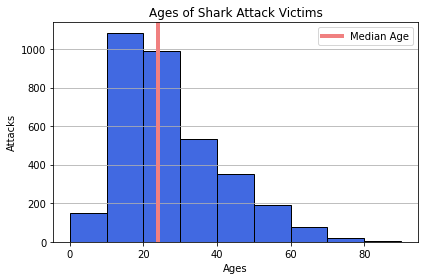

In [ ]:
#Graphic Attacks By Age

ages = Shark_data1["Age"].astype(float)

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

plt.hist(ages, bins=bins, edgecolor = "black", color="royalblue")

median = ages.median()
plt.axvline(median, color="lightcoral", label = "Median Age", linewidth=4)


plt.title("Ages of Shark Attack Victims")
plt.ylabel("Attacks")
plt.xlabel("Ages")

plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("AttacksByAge.png")

The range where the greatest number of attacks occurred was from 10 to 20, and the median is in the range of 20 to 30. Therefore, it could not be affirmed that children (6-11 years old) are the most likely to be attacked.

---
*However, it is important to take into account that by cleaning the data, many of these, due to their lack of precision, had to be converted into NaN values, which can generate biases.*

---



## **Are shark attacks where sharks were provoked more or less dangerous?**

---



In [ ]:
# exist a correlation between "FATAL injury" and "Fatal (Y/N)"
# check values in 'Fatal (Y/N)' column with a boolean array.
def check_and_update(shark_data):
    # check condition 1:
    mask = (shark_data['Injury'] == 'FATAL') & (shark_data['Fatal (Y/N)'] == 'None')
    count = mask.sum() # count number of times condition is true
    
    # update values for condition 2: 
    shark_data.loc[mask, 'Fatal (Y/N)'] = 'Yes'
    return count

count = check_and_update(shark_data)
print(f"Number of times condition is True: {count}")
#print(shark_data)
   

Number of times condition is True: 0


In [ ]:
# drop all rows that have a missing value for Type or Fatal (Y/N)
Shark_data2 = shark_data.dropna(subset=['Type', 'Fatal (Y/N)']).copy()

# Sum missing values per row
Shark_data2['sum_missing'] = Shark_data2.isnull().sum(axis=1)

# Use only the rows where the number of missing values < 5 (could introduce one or more biases)
Shark_data3 = Shark_data2.loc[Shark_data2['sum_missing'] < 5]
#Shark_data3

In [ ]:
# Graphic question number 3

Shark_data3['Type'].value_counts()

Unprovoked      4469
Provoked         561
Boat             319
Sea Disaster     212
Invalid           22
Questionable       2
Name: Type, dtype: int64

In [ ]:
shark_graph3 = Shark_data3.groupby(['Type', 'Fatal (Y/N)'],as_index=False).size()
shark_graph3= shark_graph3.sort_values(by=['size'], ascending=False)
shark_graph3.drop([0,1,2,3,6,7,8],inplace=True)
shark_graph3.head()
shark_graph3

,Type,Fatal (Y/N),size
9,Unprovoked,N,3316
10,Unprovoked,Y,1153
4,Provoked,N,543
5,Provoked,Y,18


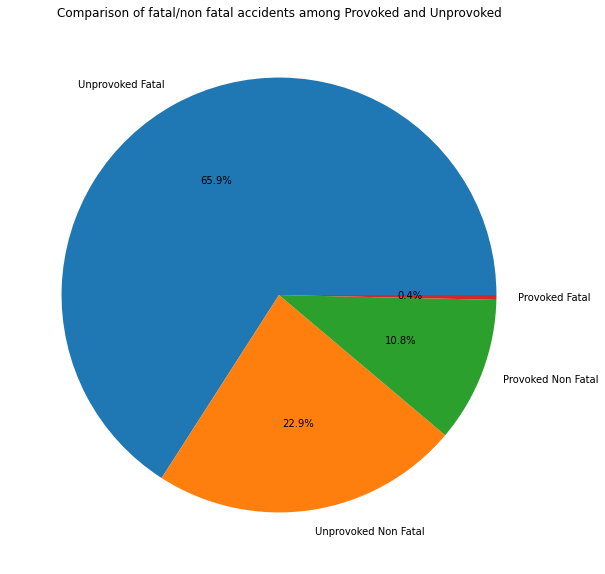

In [ ]:
mlabels=['Unprovoked Fatal','Unprovoked Non Fatal','Provoked Non Fatal','Provoked Fatal']
plt.pie(shark_graph3['size'],labels=mlabels,autopct='%1.1f%%')
plt.title('Comparison of fatal/non fatal accidents among Provoked and Unprovoked')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [ ]:
fig = px.pie(shark_graph3, names=mlabels,values='size',hole = 0.8)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(
    annotations=[dict(text="Comparison of fatality", x=0.5, y=0.5, font_size=23, showarrow=False)])
fig.update_layout(showlegend=False)

Provoked vs Unprovoked Attacks
Let's dig a little deeper on provoked and unprovoked attacks.

Provoked Attacks

*Provoked attacks occur when a human touches, hooks, nets, or otherwise aggravates the animal. Incidents that occur outside of a shark's natural habitat, such as aquariums and research holding-pens, are considered provoked, as are all incidents involving captured sharks. Sometimes humans inadvertently provoke an attack, such as when a surfer accidentally hits a shark with a surf board. So techinically surfing and fishing etc. should contribute to a larger percentage of shark attacks.*

Unprovoked Attacks

*Unprovoked attacks are initiated by the shark. They occur in a shark's natural habitat on a live human and without human provocation. So if you infiltrate they attack.*

---

65,9% of the fatal attacks are unprovoked attacks and just 0,4% are provoked.

---
*In this analisys I use only the rows where the number of missing values < 5 (it could introduce one or more biases, but at the same time it is more reliable)*



# **Are certain activities more likely to result in a shark attack?**

---



In [ ]:
#lets check if certain activities lead to provoked more attacks.

prov_activity = shark_data.groupby('Activity')['Activity'].count().sort_values(ascending=False)[:10]

fig = px.bar(prov_activity, x=prov_activity.values, y=prov_activity.index, orientation='h', labels={'index':'','x':'Attack Count'},
            title = 'Attacks by Activity')
fig.update_layout(height=500, width=800)
fig.show()

Surfing, swimming and fishing are the activities more likely to Shark Attacks.

---

*For this analisys any assumption was done!*